# 3.5 Gene expression analysis using DESeq2

## Exercise

### First use `git` to retrieve the gene counts files (total n=6). The path to files on the Github repo is:
`Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5/`  
  
Then copy to a directory where you can find it (e.g. your homework folder).
#### Locate counts files 

In [1]:
dir_counts <- "/Users/sfchen/Documents/2018_Su/Applied-Bioinformatics-HW/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)
counts_files

[1] "GSM2580321_counts.txt" "GSM2580322_counts.txt" "GSM2580325_counts.txt"
[4] "GSM2580326_counts.txt" "GSM2580329_counts.txt" "GSM2580330_counts.txt"

#### Prepare a sample table in the format required by DESeq2
Here we specify the group assignment manually. It is also possible to parse the sample data matrix from GEO, which can be found by following a link on the data series page: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE97919

In [2]:
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))
samplesInfo$samplename <- counts_files
samplesInfo$filename <- counts_files
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
samplesInfo <- samplesInfo[, -c(1:2)]

#### Check the sample table and make any corrections above if necessary

In [3]:
samplesInfo

samplename,filename,group
GSM2580321_counts.txt,GSM2580321_counts.txt,mock
GSM2580322_counts.txt,GSM2580322_counts.txt,ZIKV
GSM2580325_counts.txt,GSM2580325_counts.txt,mock
GSM2580326_counts.txt,GSM2580326_counts.txt,ZIKV
GSM2580329_counts.txt,GSM2580329_counts.txt,mock
GSM2580330_counts.txt,GSM2580330_counts.txt,ZIKV


#### Load DESeq2 package

In [20]:
library("DESeq2")

#### Import data into R

In [5]:
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

#### Check the data imported correctly

In [6]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

#### Run the main DESeq normalization and analysis function

In [7]:
dds1_deseq <- DESeq(dds1)
dds1_result <- results(dds1_deseq)
dds1_result

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


log2 fold change (MLE): group mock vs ZIKV 
Wald test p-value: group mock vs ZIKV 
DataFrame with 58735 rows and 6 columns
                         baseMean       log2FoldChange              lfcSE
                        <numeric>            <numeric>          <numeric>
ENSG00000000003  1075.63906962851    0.292138648939735 0.0965016159398865
ENSG00000000005  6.33853718932102    0.283337148889783  0.840671915223857
ENSG00000000419   813.68939359019 -0.00256326834511827  0.101739903128615
ENSG00000000457  499.648910083186  0.00215083188623771  0.111152287683124
ENSG00000000460  429.808167012587    0.109581437225331  0.120593196175707
...                           ...                  ...                ...
ENSG00000285990 0.597527409245946     1.06735094573458   3.37326995141447
ENSG00000285991   2.3494385123837    -1.87259469928952   1.66805295844409
ENSG00000285992                 0                   NA                 NA
ENSG00000285993                 0                   NA         

#### Run additional DESeq2 normalization functions

In [8]:
rld <- rlog(dds1_deseq)
vsd <- varianceStabilizingTransformation(dds1_deseq)

#### Plot a dendrogram of sample transcriptomes

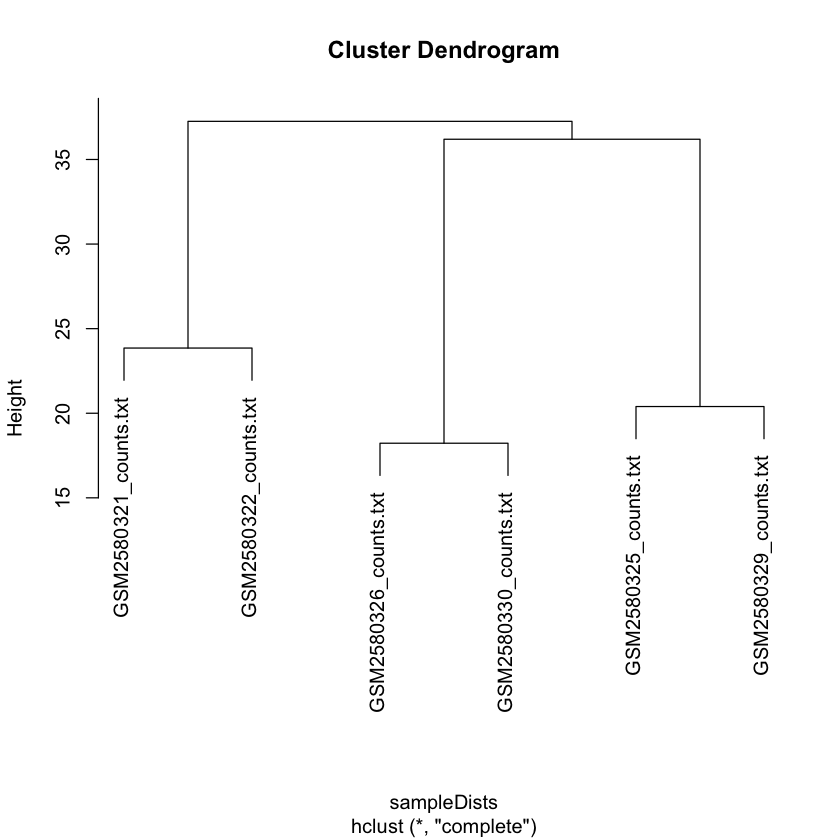

In [9]:
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

#### Principal component plot

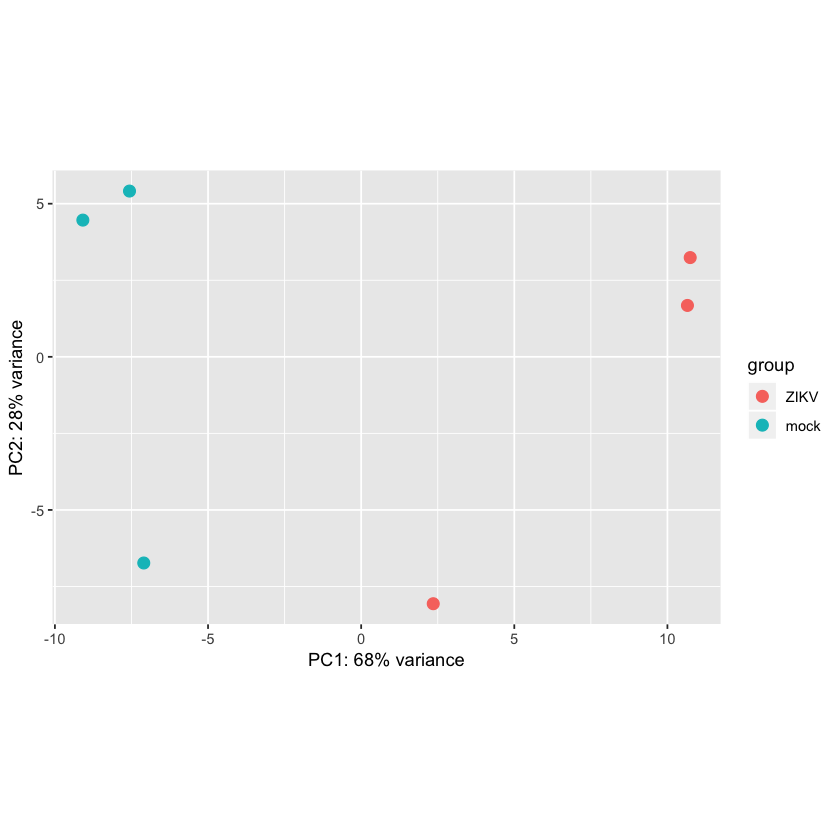

In [10]:
plotPCA(rld, intgroup="group")

## Homework

### 1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.

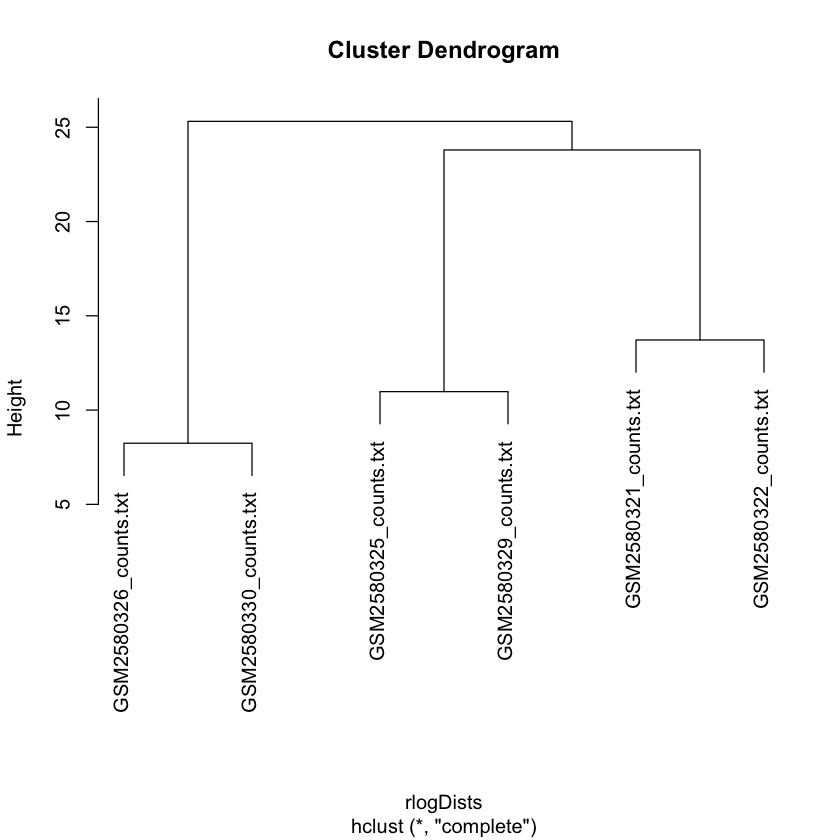

In [11]:
rlogDists <- dist(t(assay(rld)))
plot(hclust(rlogDists))

### 2) Examine the normalized counts using head(assay(vsd)) and head(assay(rld)). Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample.  
HINT: It is possible to extract elements from dds1, including raw counts.

In [12]:
vsd_temp <- head(assay(vsd))
# vsd_temp <- as.data.frame(vsd_temp)
vsd_temp

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.581933,10.351826,10.554269,10.311659,10.431451,10.199156
ENSG00000000005,7.543589,7.462387,7.543006,7.528540,7.569880,7.569783
ENSG00000000419,10.112493,10.064517,10.172314,10.165253,10.005934,10.059106
ENSG00000000457,9.573418,9.568217,9.604100,9.542536,9.608829,9.666379
ENSG00000000460,9.527347,9.437986,9.518270,9.355540,9.416553,9.445563
ENSG00000000938,7.517564,7.600088,7.511530,7.766691,7.432395,7.817386


In [13]:
rld_temp <- head(assay(rld))
# rld_temp <- as.data.frame(rld_temp)
rld_temp

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.196392,10.023092,10.174645,9.993082,10.083329,9.907657
ENSG00000000005,2.676511,2.660325,2.676335,2.673147,2.684148,2.683100
ENSG00000000419,9.678356,9.642046,9.723202,9.718194,9.595497,9.637688
ENSG00000000457,8.948431,8.944551,8.971801,8.925098,8.976018,9.020128
ENSG00000000460,8.804458,8.736003,8.796647,8.673637,8.718293,8.741719
ENSG00000000938,3.406941,3.427750,3.407257,3.483098,3.382787,3.507106


In [14]:
dds1_temp <- head(assay(dds1_deseq))
# dds1_temp <- as.data.frame(dds1_temp)
# dds1_temp$index <- row.names(dds1_temp)
dds1_temp


,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,1138,880,930,833,2113,919
ENSG00000000005,6,3,5,5,15,8
ENSG00000000419,754,680,666,731,1443,809
ENSG00000000457,447,419,386,400,979,554
ENSG00000000460,426,365,353,327,799,440
ENSG00000000938,5,8,4,17,5,25


In [15]:
library(ggplot2)

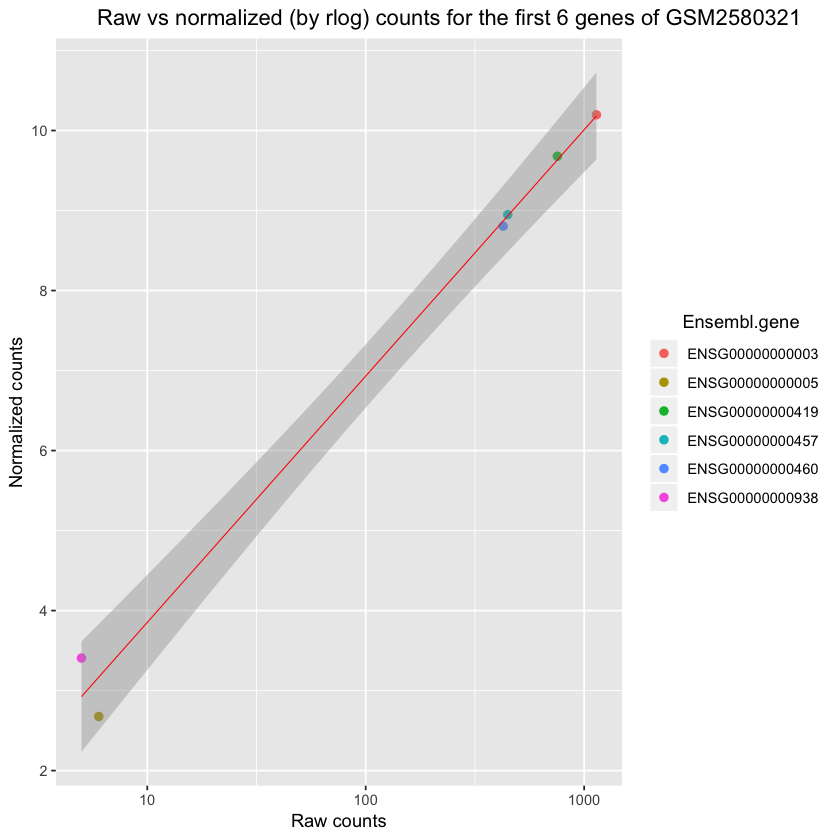

In [16]:
cbind_rld <- data.frame(Ensembl.gene = rownames(dds1_temp), raw.counts = dds1_temp[,1], normalized.counts = rld_temp[,1])
ggplot(cbind_rld, aes(x = raw.counts, y = normalized.counts, colour = Ensembl.gene)) +
  geom_point(size = 2) +
  scale_x_log10() + 
  geom_smooth(method = "lm", col = "red", size = 0.3) +
  labs(x = "Raw counts", y = "Normalized counts") +
  ggtitle("Raw vs normalized (by rlog) counts for the first 6 genes of GSM2580321") +
  theme(plot.title = element_text(hjust = -0.3),
    legend.title.align = 0.6)

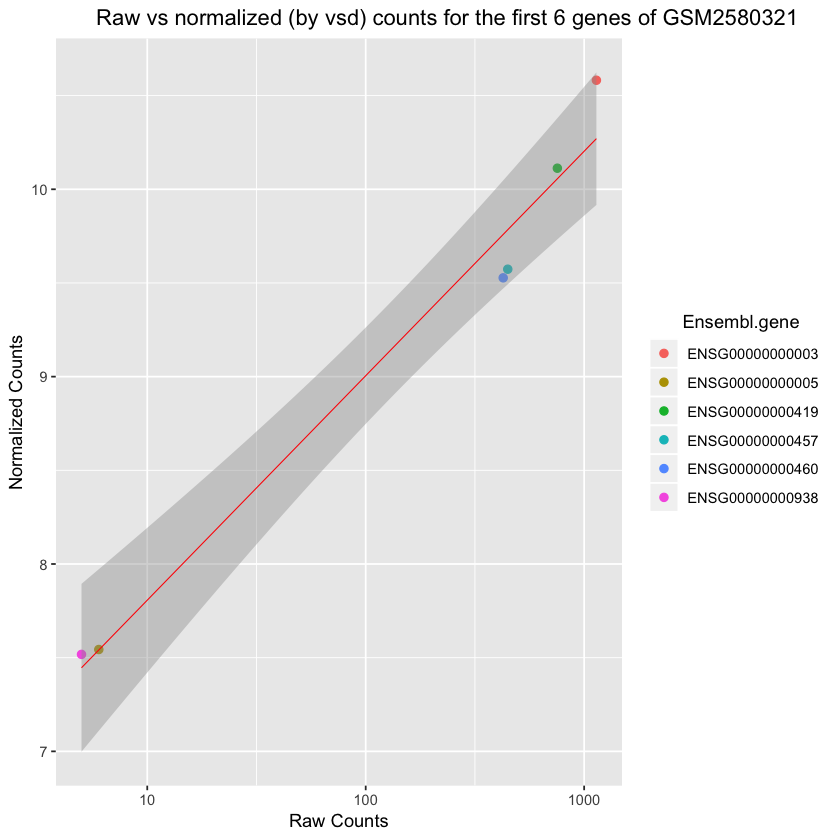

In [17]:
cbind_vsd <- data.frame(Ensembl.gene = rownames(dds1_temp), raw.counts = dds1_temp[,1], normalized.counts = vsd_temp[,1])
ggplot(cbind_vsd, aes(x = raw.counts, y = normalized.counts, colour = Ensembl.gene)) +
  geom_point(size = 2) +
  scale_x_log10() + 
  geom_smooth(method = "lm", col = "red", size = 0.3) +
  labs(x = "Raw Counts", y = "Normalized Counts") +
  ggtitle("Raw vs normalized (by vsd) counts for the first 6 genes of GSM2580321") +
  theme(plot.title = element_text(hjust = -0.3),
    legend.title.align = 0.6)